Seleção de atributos e redução de dimensionalidade
==================================================



## Algumas ferramentas adicionais do `scikit-learn`



### Gerando dados sintéticos



O `scikit-lean` possui funções para criar conjuntos de dados sintéticos de regressão e classificação. Dados sintéticos são aqueles que foram gerados por um computador e não representam fenômenos, observações ou experimentos do mundo natural.

Dados sintéticos são bastante interessantes para testar e comparar diferentes estratégias de aprendizado de máquina.

Podemos gerar dados sintéticos de regressão usando o `make_regression`.



In [1]:
from sklearn.datasets import make_regression

SEMENTE_ALEATORIA = 61455

NUM_EXEMPLOS = 50
NUM_ATRIBUTOS = 5
NUM_ATRIBUTOS_INFORMATIVOS = 3
NUM_TARGETS = 1
ESPALHAMENTO = 1 # ruído que será acrescentado aos dados

X, y = make_regression(
    n_samples=NUM_EXEMPLOS,
    n_features=NUM_ATRIBUTOS,
    n_informative=NUM_ATRIBUTOS_INFORMATIVOS,
    n_targets=NUM_TARGETS,
    noise=ESPALHAMENTO,
    random_state=SEMENTE_ALEATORIA,
)

print(X)
print()
print(y)

[[-0.705372   -0.71949434  1.693676   -0.34952121  0.26823814]
 [-0.19449881 -0.36169926  1.38503778  1.41785474  0.29916272]
 [ 0.1758216   1.03736567  1.05740064 -2.52942376 -0.85307725]
 [ 0.79200443  1.23838689  0.52208133 -0.8077295   0.45908373]
 [ 0.28777516  1.29375549 -0.28575167 -0.43929404  1.33754704]
 [-1.6509546   0.04073985 -1.13258621  0.9787169   0.62855612]
 [ 0.95176614  0.64624854 -0.10676061  0.20512138 -2.33206493]
 [-0.8880897   0.71962212 -0.92404754  0.75653657 -0.10722277]
 [ 0.59776511 -1.09885832 -0.28340217  0.40402228  1.9805953 ]
 [-0.06013066 -0.56330832  1.4691635  -1.03669535  0.34765015]
 [-0.57775762 -1.13458581  0.66240418  0.82656792 -0.26970802]
 [-0.59624938 -0.24529711 -0.65065595  0.42370764  1.01574793]
 [-0.49999963  1.09792786 -1.17616678  0.66570977  0.43559954]
 [-0.33180377  0.13616375 -1.07150115 -0.60129452  0.13539244]
 [-0.3206453  -1.11130764 -0.01413086 -0.5349757  -1.54222872]
 [-1.40722537 -2.08737559  0.32109367 -0.18057144  2.01

Podemos gerar dados sintéticos de classificação usando o `make_classification`.



In [2]:
from sklearn.datasets import make_classification

NUM_EXEMPLOS = 50
NUM_ATRIBUTOS = 5
NUM_ATRIBUTOS_INFORMATIVOS = 2
NUM_ATRIBUTOS_REDUNDANTES = 1
NUM_CLASSES = 2
BALANCO_CLASSES = [0.5, 0.5]  # quantidade de cada rótulo do target
PCT_ESPALHAMENTO = 0.01  # porcentagem de targets que vão trocar de classe

X, y = make_classification(
    n_samples=NUM_EXEMPLOS,
    n_features=NUM_ATRIBUTOS,
    n_informative=NUM_ATRIBUTOS_INFORMATIVOS,
    n_redundant=NUM_ATRIBUTOS_REDUNDANTES,
    n_classes=NUM_CLASSES,
    weights=BALANCO_CLASSES,
    flip_y=PCT_ESPALHAMENTO,
    random_state=SEMENTE_ALEATORIA,
)

print(X)
print()
print(y)

[[ 2.42801128 -0.43929404  0.05170596  1.59176695  1.33754704]
 [ 0.59623453 -0.41928119 -1.22056845  1.40987257 -2.52942376]
 [-0.84600135 -0.58189106 -1.17893231  0.40458587  1.67356993]
 [ 1.26731014  1.41785474 -0.00439895  0.85676279  0.29916272]
 [ 1.03712628  0.54179886 -0.64577215  1.23174458  0.11547314]
 [-0.33581507  0.28777516  0.70320143 -0.80708689 -0.8077295 ]
 [ 4.25173943  2.65872347  1.84029954  1.34163252 -1.35497439]
 [-1.30626253  0.52793542  1.93971257 -2.48204492  1.36754283]
 [ 0.80332238 -0.11113483  0.1750973   0.39610595 -1.00320489]
 [-0.8155351   0.5246971  -1.15834258  0.40808281 -0.13769022]
 [ 1.70285119 -0.36715731  0.29770362  0.90034702 -0.58643281]
 [ 0.020698    2.09285714 -2.03667847  1.69674673  0.5207327 ]
 [ 0.73006212  1.30113629 -0.01009255  0.49980239  0.58835807]
 [-0.96741479 -0.24783783  0.48993793 -1.05605757 -0.88133209]
 [-0.75758598  1.02467907 -1.2627958   0.53339787 -0.62706904]
 [-0.27079341 -1.24686758 -1.72619419  1.24398167 -0.32

Para mais informações, veja a referência [5].



### Sequência de ações usando `Pipeline`



O `scikit-learn` tem uma forma de combinar processos chamada de `Pipeline` que atua como uma tubulação de informação: a informação que entra no `Pipeline` é transmitida para todas as componentes do `Pipeline` até o fim. Uma forma de criar um `Pipeline` é usando o `make_pipeline` e passando para ele todas as etapas do processo.

Vamos ver um exemplo onde queremos criar um processo que normaliza os dados e treina um algoritmo de $k$​-NN.



In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

NUM_VIZINHOS = 7

modelo_knn_composto = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=NUM_VIZINHOS),
)

Vamos utilizar o conjunto de dados Iris como exemplo.



In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

TAMANHO_TESTE = 0.1

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

Para treinar um modelo composto nós usamos o `fit` da mesma maneira que fazemos usualmente.



In [5]:
from sklearn.metrics import accuracy_score

modelo_knn_composto.fit(X_treino, y_treino)

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo_knn_composto.predict(X_verdadeiro)

acuracia = accuracy_score(y_verdadeiro, y_previsto)

print(f"A acurácia do modelo foi de {(acuracia * 100):.2f}%.")

A acurácia do modelo foi de 93.33%.


Podemos usar nosso pipeline para uma validação cruzada. O pipeline irá funcionar como um algoritmo &ldquo;normal&rdquo; do `scikit-learn`.



In [6]:
from sklearn.model_selection import cross_val_score

NUM_FOLDS = 10

scores = cross_val_score(
    modelo_knn_composto,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="accuracy",
)

print("Os scores foram de: ", scores)
print()
print(f"A média dos scores é de: {(scores.mean() * 100):.2f}%")

Os scores foram de:  [0.92857143 1.         1.         0.85714286 0.92857143 0.92307692
 1.         1.         1.         1.        ]

A média dos scores é de: 96.37%


Para saber mais sobre `Pipelines`, veja a [documentação](https://scikit-learn.org/stable/modules/compose.html).



## Seleção de atributos pelo limiar da variância



Algoritmos de aprendizado de máquina supervisionados utilizam-se dos padrões dos atributos para a indução dos modelos. Um atributo com zero variância não tem como contribuir para a indução de modelos, uma vez que não apresenta padrão algum que possa ser utilizado pelo algoritmo. Vamos checar a variância de um conjunto de dados de exemplo.



In [7]:
# Exemplo retirado da ref. [4]

from sklearn.feature_selection import VarianceThreshold
import numpy as np

X = [
    [0, 2, 0, 3],
    [0, 1, 4, 3],
    [0, 1, 1, 3],
]

print(np.var(X, axis=0))

[0.         0.22222222 2.88888889 0.        ]


A estratégia mais simples para seleção de atributos é remover os atributos com variância zero. O `scikit-learn` tem um seletor que faz isso, o `VarienceThreshold`.



In [8]:
redutor = VarianceThreshold()

redutor.fit(X)

X_modificado = redutor.transform(X)

print(X_modificado)

[[2 0]
 [1 4]
 [1 1]]


Podemos também controlar a variância mínima que um atributo deve ter para *não* ser eliminado.



In [9]:
VARIANCIA_MINIMA = 1

redutor = VarianceThreshold(VARIANCIA_MINIMA)

redutor.fit(X)

X_modificado = redutor.transform(X)

print(X_modificado)

[[0]
 [4]
 [1]]


Muito cuidado ao remover atributos usando um valor diferente de zero para variância mínima. É importante que esta escolha seja muito bem pensada e justificada.



## Seleção de atributos por remoção recursiva de atributos



Os passos desta estratégia são os seguintes:

1.  Escolher um modelo preditivo que seja capaz de atribuir pesos para cada atributo (modelos lineares são um exemplo);

2.  Escolher o número de atributos que deseja ter ao final do processo;

3.  Treinar o modelo escolhido no passo 1 utilizando todos os atributos;

4.  Remover o atributo com menor importância (menor peso) segundo o modelo treinado;

5.  Se o número de atributos restantes é igual ao número definido no passo 2 então pare. Do contrário, siga ao passo seguinte;

6.  Treinar o modelo escolhido no passo 1 utilizando os atributos restantes e retornar ao passo 4.

Vamos ver como utilizar esta estratégia em um problema de regressão.



In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

NUM_FEATURES_DESEJADAS = 5

X, y = make_regression(
    n_samples=100,
    n_features=10,
    n_informative=3,
    noise=0.1,
    random_state=SEMENTE_ALEATORIA,
)

modelo = LinearRegression()

seletor_rfe = RFE(modelo, n_features_to_select=NUM_FEATURES_DESEJADAS)
seletor_rfe.fit(X, y)

X_mod = seletor_rfe.transform(X)

print(f"Número de atributos selecionados: {seletor_rfe.n_features_}")
print(f"Colunas selecionadas: {seletor_rfe.support_}")
print(f"Ordenação (rank) dos atributos {seletor_rfe.ranking_}")

Número de atributos selecionados: 5
Colunas selecionadas: [False  True False  True  True False False False  True  True]
Ordenação (rank) dos atributos [3 1 4 1 1 2 6 5 1 1]


Vamos ver como utilizar esta estratégia em um problema de classificação.



In [11]:
from sklearn.linear_model import LogisticRegression

NUM_FEATURES_DESEJADAS = 5

X, y = make_classification(
    n_samples=100,
    n_features=10,
    n_informative=3,
    n_redundant=1,
    n_classes=3,
    random_state=SEMENTE_ALEATORIA,
)

modelo = LogisticRegression()

seletor_rfe = RFE(modelo, n_features_to_select=NUM_FEATURES_DESEJADAS)
seletor_rfe.fit(X, y)

X_mod = seletor_rfe.transform(X)

print(f"Número de atributos selecionados: {seletor_rfe.n_features_}")
print(f"Colunas selecionadas: {seletor_rfe.support_}")
print(f"Ordenação (rank) dos atributos {seletor_rfe.ranking_}")

Número de atributos selecionados: 5
Colunas selecionadas: [False  True  True  True False  True  True False False False]
Ordenação (rank) dos atributos [5 1 1 1 3 1 1 6 2 4]


Uma desvantagem desta estratégia é que devemos informar quantos atributos queremos selecionar.



## Seleção de atributos pelo fator de inflação de variância (VIF)



Antes de definir como funciona esta estratégia, precisamos entender o conceito de multicolinearidade e o coeficiente de determinação.



### Multicolinearidade



Este conceito é muito bem definido na página da Wikipédia : &ldquo;A multicolinearidade é um fenômeno no qual um atributo em um modelo de regressão pode ser perfeitamente previsto a partir de outros atributos.&rdquo; (tradução livre da referência [6])

Atributos com alta multicolinearidade praticamente não trazem informação nova para o conjunto de dados (afinal, a informação que ele trás já está representada na combinação linear dos demais atributos). Desta maneira, reduzir a dimensionalidade de conjuntos de dados pela remoção dos atributos com alta multicolinearidade é uma estratégia interessante, particularmente para o treinamento de modelos lineares e de redes neurais artificiais.



### Coeficiente de determinação



O coeficiente de determinação é uma métrica para modelos lineares que representa a proporção da variação da variável dependente que é explicada/predita pela variável independente. É usualmente escrito como $r^2$ ou $R^2$.

O valor máximo de $R^2$ é 1. Quanto maior for o $R^2$, melhor seu modelo se ajusta aos dados.

Infelizmente, existe mais de uma definição para este coeficiente e por conta disso pode gerar confusão caso não fique explícito qual a definição utilizada. Aqui neste curso seguiremos da maneira descrita abaixo.

Para o caso do modelo linear simples <u>com intercepto</u> (isto é, $\beta_0 \neq 0$) temos a seguinte situação

$$
y = \beta_0 + \beta_1 x + \epsilon,
$$

com coeficiente de determinação dado por

$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - E[y])^2},
$$

onde $y_i$ é o valor do target do exemplo $i$, $\hat{y}_i$ é o valor previsto do target do exemplo $i$ e $E[y]$ é o valor esperado do target (isto é, a média de $y$).

Já para o caso do modelo linear simples <u>sem intercepto</u> (isto é, $\beta_0 = 0$) temos a seguinte situação

$$
y = \beta_1 x + \epsilon,
$$

com coeficiente de determinação dado por

$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i y_i^2}.
$$

Uma situação onde temos um modelo linear sem intercepto é no gráfico de performance de modelos onde temos o valor real graficado *versus* o valor predito de um target. Neste caso, não faz sentido ter um intercepto e o $R^2$ deve ser computado da maneira adequada (equação imediatamente acima deste parágrafo).

**Nota**: o $R^2$ calculado pelo `scikit-learn` segue a primeira expressão (isto é, a que leva em consideração que o modelo *tem* um intercepto).

Quando o valor do $R^2$ é igual a zero, temos que o modelo linear é tão bom quanto o modelo baseline que sempre prevê a média dos valores. Observe que se seu modelo linear for *pior* que o modelo baseline, o valor do $R^2$ será negativo! É contraintuitivo, porém é o que acontece.



### Algoritmo do fator de inflação de variância



O fator de inflação de variância (*variance inflation factor* em inglês, ou simplesmente VIF) tem os seguintes passos

1.  Escolha o valor do limiar do $\mathrm{VIF}$. Escolhas usuais são o valor 10 ou o valor 5. O valor 5 é mais rigoroso e irá resultar em um conjunto com menos atributos selecionados ao final do algoritmo;

2.  Para cada atributo disponível, considere ele o target e treine um modelo linear com os atributos restantes. Registre o valor $\mathrm{VIF}$ do modelo sendo que $\mathrm{VIF} = 1 / (1 - R^2)$;

3.  Se pelo menos um dos valores $\mathrm{VIF}$ observados no passo 2 for maior que o limiar definido no passo 1, vá ao passo seguinte. Do contrário, encerre o processo;

4.  Remova o atributo de maior valor $\mathrm{VIF}$ e retorne ao passo 2.

O VIF é uma boa estratégia para eliminar multicolinearidade nos atributos. Uma desvantagem é que é um processo bastante custoso computacionalmente!

Não existe ainda uma implementação do VIF no `scikit-learn`. O código abaixo pode ser usado caso queira usar esta estratégia.



In [12]:
from sklearn.linear_model import LinearRegression


def selecao_vif(df_atributos, limiar_vif):
    """Realiza a seleção de atributos por VIF.

    Args:
      df_atributos: DataFrame contendo os atributos.
      limiar_vf: valor do limiar do vif. Número positivo. Usualmente é 5 ou 10.

    Returns:
      DataFrame com os atributos selecionados.
    """

    df = df_atributos.copy()

    while True:
        VIFs = []

        for col in df.columns:
            X = df.drop(col, axis=1).values
            y = df[col].values

            r_quadrado = LinearRegression().fit(X, y).score(X, y)

            if r_quadrado != 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")

            VIFs.append(VIF)

        VIF_maximo = max(VIFs)

        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break

    return df

Vamos testar com dados sintéticos.



In [13]:
import pandas as pd

LIMIAR_VIF = 10

X, y = make_regression(
    n_samples=100,
    n_features=100,
    n_informative=10,
    noise=1,
    random_state=SEMENTE_ALEATORIA,
)

X = pd.DataFrame(X)

X_mod = selecao_vif(X, LIMIAR_VIF)

print(X_mod.shape)

(100, 88)


## Redução de dimensionalidade pela análise das componentes principais (PCA)



### Introdução



A *Análise das Componentes Principais* (Principal Component Analysis em inglês, ou simplesmente PCA) é uma estratégia muito usada em diversos contextos científicos para reduzir a dimensionalidade de conjuntos de dados.

De forma simplificada, esta técnica consiste em alterar o sistema de coordenadas dos dados de forma que as novas coordenadas (obtidas após uma transformação linear) estejam ordenadas com relação a variância dos dados.

Suponha que você tenha um conjunto de dados com $N=3$ dimensões (isto é, uma tabela de atributos com 3 colunas) sendo elas $(x_1,x_2,x_3)$. O PCA irá realizar uma transformação linear nestes dados convertendo-os para as coordenadas $(z_1, z_2,z_3)$. As coordenadas $z_i$ são chamadas de *componentes principais* do conjunto de dados (também conhecidas como PC). As coordenadas $z_i$ são todas ortogonais entre si e cada coordenada $z_i$ é uma combinação linear de $x_1$, $x_2$ e $x_3$ da seguinte maneira

$$
z_i = \phi_{1i} x_1 + \phi_{2i} x_2 + \phi_{3i} x_3,
$$

onde os coeficientes $\phi_{ki}$ satisfazem a seguinte expressão

$$
\sum_{k=1}^N \phi_{ki}^2 = 1.
$$

Observe que como a transformação é linear, nenhuma informação foi perdida. Os dados convertidos para as coordenadas $(z_1, z_2, z_3)$ ainda carregam todas as informações que tínhamos quando estavam nas coordenadas $(x_1, x_2, x_3)$.

A conversão de coordenadas pelo PCA é realizada de forma que a variância dos dados na direção $z_i$ é sempre maior ou igual à variância na direção $z_{i+1}$.

Observe que se não há perda de informação **e** o novo sistema de coordenadas está ordenado pela variância dos dados, então <u>a maior quantidade de informação está armazenada nas primeiras componentes principais</u>. Esta característica nos permite tanto reduzir a dimensionalidade do problema (escolhendo as primeiras $n$ PCs) quanto graficar dados de alta dimensionalidade em gráficos 2D ou 3D (graficando apenas as primeiras 2 ou 3 PCs).



### Demonstração visual



Esta seção foi construída baseada nos códigos e informação das referências [8-13].

Vamos criar um conjunto de dados sintéticos.



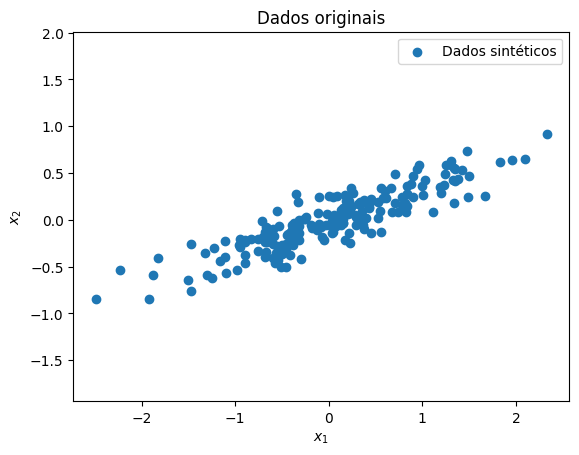

In [14]:
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

figura, eixo = plt.subplots()

eixo.scatter(
    X[:, 0],
    X[:, 1],
    label="Dados sintéticos",
)

eixo.set(xlabel="$x_1$", ylabel="$x_2$", title="Dados originais")
eixo.legend()
eixo.axis("equal");  # para deixar o gráfico com a mesma escala em x e y

Para computar as componentes principais, utilizaremos o `PCA` do `scikit-learn`. Com ele, vamos obter os autovalores e autovetores do PCA (ver próxima seção para mais informações).



In [15]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

print(autovalores)
print()
print(autovetores)

[0.7625315 0.0184779]

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Vamos observar os dados originais com as suas componentes principais.



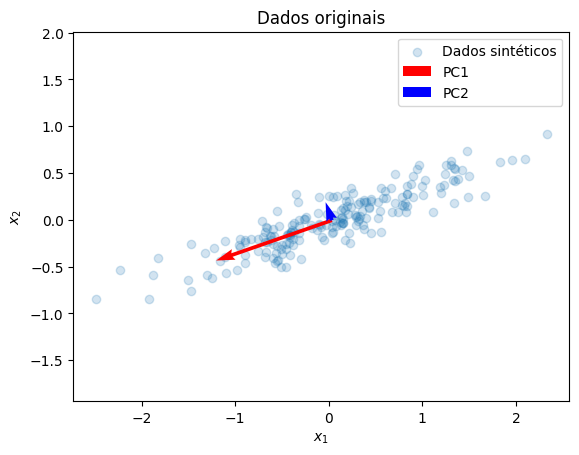

In [16]:
figura, eixo = plt.subplots()

eixo.scatter(
    X[:, 0],
    X[:, 1],
    label="Dados sintéticos",
    alpha=0.2,
)

eixo.set(xlabel="$x_1$", ylabel="$x_2$", title="Dados originais")

origem = [np.mean(X[:, 0]), np.mean(X[:, 1])]

eixo.quiver(
    *origem,
    autovetores[0, 0] * 3 * np.sqrt(autovalores[0]),
    autovetores[1, 0] * 3 * np.sqrt(autovalores[0]),
    angles="xy",
    scale_units="xy",
    scale=2,
    color="r",
    label="PC1",
    zorder=11,
)

eixo.quiver(
    *origem,
    autovetores[0, 1] * 3 * np.sqrt(autovalores[1]),
    autovetores[1, 1] * 3 * np.sqrt(autovalores[1]),
    angles="xy",
    scale_units="xy",
    scale=2,
    color="b",
    label="PC2",
    zorder=11,
)

eixo.legend()
eixo.axis("equal");  # para deixar o gráfico com a mesma escala em x e y

Vamos observar os dados nas novas coordenadas (coordenadas originais são mostradas também).



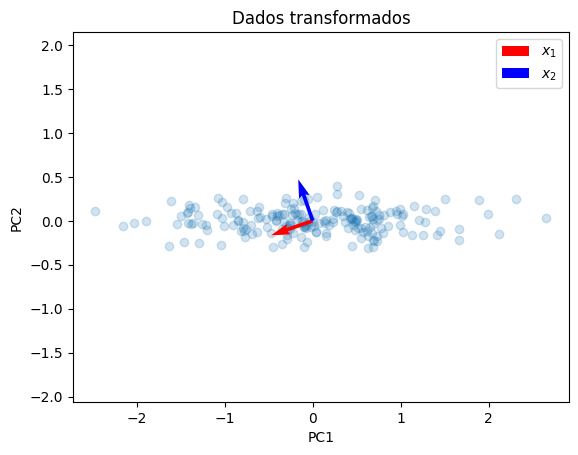

In [17]:
X_pca = pca.transform(X)

figura, eixo = plt.subplots()

eixo.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    alpha=0.2,
)

eixo.quiver(
    0, 0,
    autovetores[0, 0],
    autovetores[1, 0],
    angles="xy",
    scale_units="xy",
    scale=2,
    color="r",
    label="$x_1$",
    zorder=11,
)

eixo.quiver(
    0, 0,
    autovetores[0, 1],
    autovetores[1, 1],
    angles="xy",
    scale_units="xy",
    scale=2,
    color="b",
    label="$x_2$",
    zorder=11,
)

eixo.legend()
eixo.set(xlabel="PC1", ylabel="PC2", title="Dados transformados")
eixo.axis("equal");  # para deixar o gráfico com a mesma escala em x e y

Observe como podemos reduzir a dimensionalidade do problema. No gráfico abaixo, vemos a projeção dos dados na primeira componente principal.



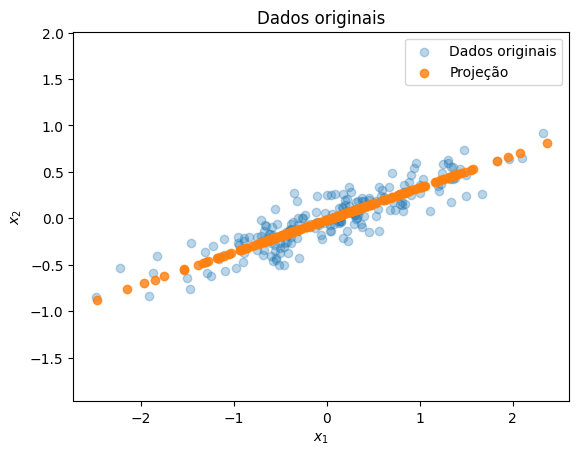

In [18]:
NUM_COMPONENTES = 1

pca = PCA(n_components=NUM_COMPONENTES)

pca.fit(X)

X_projecao = pca.transform(X)
X_projecao = pca.inverse_transform(X_projecao)

figura, eixo = plt.subplots()

eixo.scatter(
    X[:, 0],
    X[:, 1],
    alpha=0.3,
    label="Dados originais",
)

eixo.scatter(
    X_projecao[:, 0],
    X_projecao[:, 1],
    alpha=0.8,
    label="Projeção",
)

eixo.set(xlabel="$x_1$", ylabel="$x_2$", title="Dados originais")

eixo.legend()
eixo.axis("equal");  # para deixar o gráfico com a mesma escala em x e y

### A matemática por trás do PCA



Existe bastante material online sobre a matemática por trás do PCA. Em particular, veja o capítulo 10.1 da referência [1] e os vídeos nas referências [10, 11]. Esta seção inteira foi baseada no material disponível na referência [12].

Vamos seguir em frente com os dados do conjunto Iris.



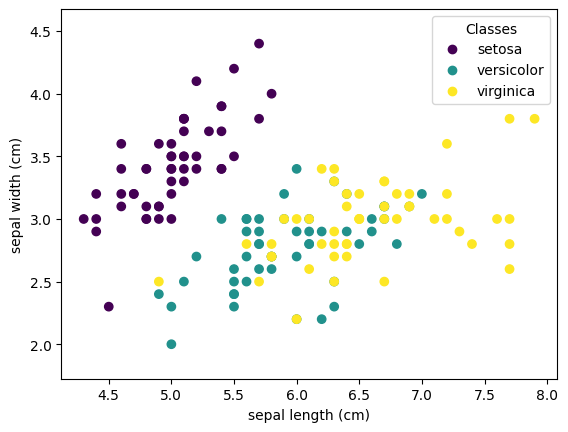

In [19]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

figura, eixo = plt.subplots()

pontos = eixo.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
)

eixo.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
eixo.legend(pontos.legend_elements()[0], iris.target_names, title="Classes")
eixo.axis("equal");

O primeiro passo é centralizar os dados pela média.



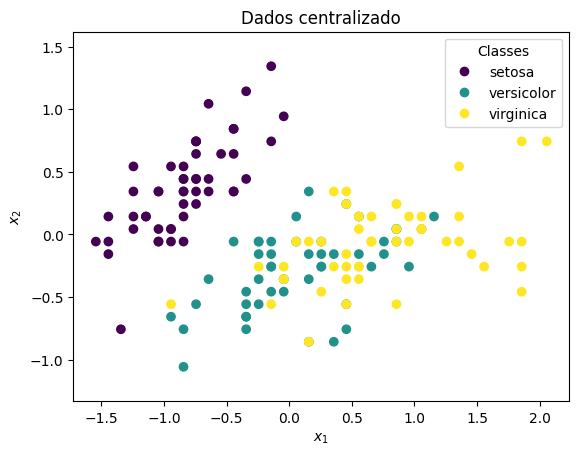

In [20]:
medias = X.mean(axis=0)

X_centralizado = X - medias

figura, eixo = plt.subplots()

pontos = eixo.scatter(
    X_centralizado[:, 0],
    X_centralizado[:, 1],
    c=y,
)

eixo.set(xlabel="$x_1$", ylabel="$x_2$", title="Dados centralizado")
eixo.legend(pontos.legend_elements()[0], iris.target_names, title="Classes")
eixo.axis("equal");

O segundo passo é computar a matriz de covariância. A matriz de covariância $\mathbf{X}$ é uma matriz simétrica contendo todas as possíveis covariâncias computadas para cada atributo, dois a dois. Supondo que temos três atributos $(x_1, x_2, x_3)$, a matriz de covariância será:

$$
\mathbf{X} =
\left[\begin{array}{ccc}
\mathrm{cov}(x_{1},x_{1})&\mathrm{cov}(x_{1},x_{2})&\mathrm{cov}(x_{1},x_{3})\\
\mathrm{cov}(x_{2},x_{1})&\mathrm{cov}(x_{2},x_{2})&\mathrm{cov}(x_{2},x_{3})\\
\mathrm{cov}(x_{3},x_{1})&\mathrm{cov}(x_{3},x_{2})&\mathrm{cov}(x_{3},x_{3})\\
\end{array} \right].
$$

Relembrando que $\mathrm{cov}(x_i,x_i) = \mathrm{Var}(x_i)$ temos que

$$
\mathbf{X} =
\left[\begin{array}{ccc}
\mathrm{Var}(x_{1})&\mathrm{cov}(x_{1},x_{2})&\mathrm{cov}(x_{1},x_{3})\\
\mathrm{cov}(x_{2},x_{1})&\mathrm{Var}(x_{2})&\mathrm{cov}(x_{2},x_{3})\\
\mathrm{cov}(x_{3},x_{1})&\mathrm{cov}(x_{3},x_{2})&\mathrm{Var}(x_{3})\\
\end{array} \right].
$$

Lembre-se que definimos covariância no notebook 2 de estatística. Abaixo (entre as linhas horizontais) está o texto e a imagem que vimos.

<hr>

A medida da *covariância* de uma população é uma forma de quantificar o quão &ldquo;dependentes&rdquo; duas variáveis aleatórias são. A formulação matemática da covariância é:

$$
\sigma_{XY} = \mathrm{cov}(X, Y) = E[(X - E[X])(Y - E[Y])]
$$

Você pode observar os conceitos discutidos acima na imagem abaixo.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a0/Covariance_trends.svg" width="200">


<hr>

É fácil observar como expandir a matriz de covariância para um conjunto de dados com um número diferente de atributos.

Podemos computar a matriz de covariância usando `numpy`.



In [21]:
matriz_cov = np.cov(X, rowvar=False)
print(matriz_cov)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Nossa tarefa agora é computar os autovalores e autovetores *da matriz de covariância*. Vale a pena ver o vídeo da referência [12] para relembrar o que são autovalores e autovetores. Novamente, `numpy` já tem uma função para nos ajudar.



In [22]:
autovalores, autovetores = np.linalg.eigh(matriz_cov)

print(autovalores)
print()
print(autovetores)

[0.02383509 0.0782095  0.24267075 4.22824171]

[[ 0.31548719  0.58202985  0.65658877 -0.36138659]
 [-0.3197231  -0.59791083  0.73016143  0.08452251]
 [-0.47983899 -0.07623608 -0.17337266 -0.85667061]
 [ 0.75365743 -0.54583143 -0.07548102 -0.3582892 ]]


Agora precisamos ordenar os autovalores do maior para o menor. Após esta etapa, precisamos reordenar os autovetores da mesma maneira pois cada autovalor tem um autovetor associado.



In [23]:
indices_ordenados = np.argsort(autovalores)[::-1]

autovalores_ordenados = autovalores[indices_ordenados]
autovetores_ordenados = autovetores[:, indices_ordenados]

print(autovalores_ordenados)
print()
print(autovetores_ordenados)

[4.22824171 0.24267075 0.0782095  0.02383509]

[[-0.36138659  0.65658877  0.58202985  0.31548719]
 [ 0.08452251  0.73016143 -0.59791083 -0.3197231 ]
 [-0.85667061 -0.17337266 -0.07623608 -0.47983899]
 [-0.3582892  -0.07548102 -0.54583143  0.75365743]]


A matriz de autovetores ordenados tem um nome específico neste contexto: chama-se de *matriz de cargas* ou *matriz de loadings*.



In [24]:
matriz_cargas = autovetores_ordenados

nomes_componentes = [f"PC{i+1}" for i in range(X.shape[1])]

df_matriz_cargas = pd.DataFrame(
    matriz_cargas,
    columns=nomes_componentes,
    index=iris.feature_names,
)

df_matriz_cargas

,PC1,PC2,PC3,PC4
sepal length (cm),-0.361387,0.656589,0.582030,0.315487
sepal width (cm),0.084523,0.730161,-0.597911,-0.319723
petal length (cm),-0.856671,-0.173373,-0.076236,-0.479839
petal width (cm),-0.358289,-0.075481,-0.545831,0.753657


Observe que cada PC é uma combinação linear de cada um dos atributos onde o peso de cada atributo é dado na matriz de cargas. Veja que o atributo mais importante para a PC1 é `petal lenght (cm)` pois seu valor em módulo é o maior da PC1. O menos importante para a PC1 é o `sepal width (cm)` pois seu valor em módulo é o menor da PC1.

Agora podemos selecionar quantas dimensões desejamos. Cada dimensão será um vetor da matriz de cargas.



In [25]:
NUM_DIMENSOES = 2
matriz_cargas_reduzida = matriz_cargas[:, 0:NUM_DIMENSOES]

print(matriz_cargas_reduzida)

[[-0.36138659  0.65658877]
 [ 0.08452251  0.73016143]
 [-0.85667061 -0.17337266]
 [-0.3582892  -0.07548102]]


Com isso, finalmente podemos aplicar a transformada do PCA. A transformada envolve a multiplicação matricial da matriz de cargas reduzida com os dados centralizados pela média. O símbolo `@` é o símbolo do Python para multiplicação matricial.



In [26]:
X_reduzido = (matriz_cargas_reduzida.T @ X_centralizado.T).T

print(X_reduzido)

[[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]
 [ 2.28085963  0.74133045]
 [ 2.82053775 -0.08946138]
 [ 2.62614497  0.16338496]
 [ 2.88638273 -0.57831175]
 [ 2.6727558  -0.11377425]
 [ 2.50694709  0.6450689 ]
 [ 2.61275523  0.01472994]
 [ 2.78610927 -0.235112  ]
 [ 3.22380374 -0.51139459]
 [ 2.64475039  1.17876464]
 [ 2.38603903  1.33806233]
 [ 2.62352788  0.81067951]
 [ 2.64829671  0.31184914]
 [ 2.19982032  0.87283904]
 [ 2.5879864   0.51356031]
 [ 2.31025622  0.39134594]
 [ 2.54370523  0.43299606]
 [ 3.21593942  0.13346807]
 [ 2.30273318  0.09870885]
 [ 2.35575405 -0.03728186]
 [ 2.50666891 -0.14601688]
 [ 2.46882007  0.13095149]
 [ 2.56231991  0.36771886]
 [ 2.63953472  0.31203998]
 [ 2.63198939 -0.19696122]
 [ 2.58739848 -0.20431849]
 [ 2.4099325   0.41092426]
 [ 2.64886233  0.81336382]
 [ 2.59873675  1.09314576]
 [ 2.63692688 -0.12132235]
 [ 2.86624165  0.06936447]
 [ 2.62523805  0.59937002]
 

Com as componentes principais, podemos graficar os dados que eram em 4 dimensões usando apenas as duas primeiras componentes principais. Sabemos que estas duas dimensões que graficados carregam a maior parte da informação do conjunto de dados. Mas quanto de informação elas carregam? Vamos ver na próxima seção!



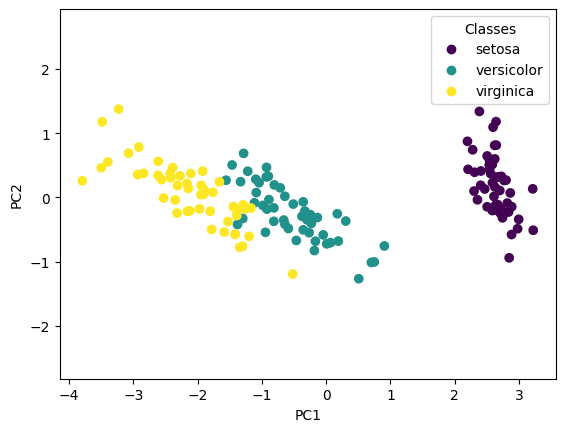

In [27]:
figura, eixo = plt.subplots()

pontos = eixo.scatter(
    X_reduzido[:, 0],
    X_reduzido[:, 1],
    c=y,
)

eixo.set(xlabel="PC1", ylabel="PC2")
eixo.legend(pontos.legend_elements()[0], iris.target_names, title="Classes")
eixo.axis("equal");

### Variância explicada



Vamos carregar os dados Iris e computar as componentes principais usando o `PCA` do `scikit-learn`.



In [28]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

pca = PCA()

pca.fit(X)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_

print(autovalores)
print()
print(variancia_explicada)
print()
print(autovetores)

[4.22824171 0.24267075 0.0782095  0.02383509]

[0.92461872 0.05306648 0.01710261 0.00521218]

[[ 0.36138659  0.65658877 -0.58202985 -0.31548719]
 [-0.08452251  0.73016143  0.59791083  0.3197231 ]
 [ 0.85667061 -0.17337266  0.07623608  0.47983899]
 [ 0.3582892  -0.07548102  0.54583143 -0.75365743]]


Vamos observar o quanto da variância cada componente principal explica.



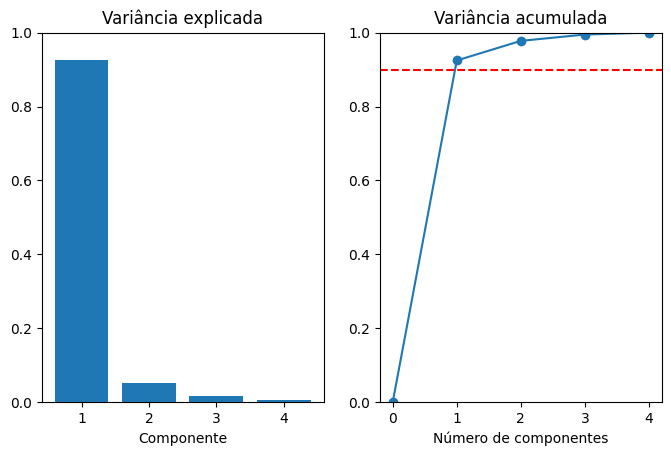

In [29]:
# Código abaixo baseado no notebook de PCA escrito pelo Prof. James de Almeida

id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8);

Observamos neste caso que apenas uma ou duas componentes principais já armazenam praticamente toda a informação do conjunto de dados.



### Regressão com componentes principais



Podemos utilizar a estratégia de redução de dimensionalidade por PCA como parte do tratamento de dados antes de treinar modelos de aprendizado de máquina. Mesmo perdendo informação com a redução de dimensionalidade, é possível que a transformação PCA ajude no ajuste do modelo.

No exemplo abaixo, incluímos um normalizador padrão (`StandardScaler`) no pipeline. O normalizador padrão é interessante de ser utilizado em modelos baseados em distâncias (como é o caso do $k$​-NN) para que as distâncias entre atributos de magnitudes diferentes seja comparável. Fora isso, diversas referências consultadas defendem que é *altamente recomendado* usar este normalizador antes de aplicar PCA (porém ele não é *estritamente necessário*).



In [30]:
NUM_COMPONENTES = 2
NUM_VIZINHOS = 7

iris = datasets.load_iris()

X = iris.data
y = iris.target

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

modelo = make_pipeline(
    StandardScaler(),
    PCA(NUM_COMPONENTES),
    KNeighborsClassifier(n_neighbors=NUM_VIZINHOS),
)

modelo.fit(X_treino, y_treino)

X_verdadeiro = X_teste
y_verdadeiro = y_teste

y_previsto = modelo.predict(X_verdadeiro)

acuracia = accuracy_score(y_verdadeiro, y_previsto)

print(f"A acurácia do modelo foi de {(acuracia * 100):.2f}%.")

A acurácia do modelo foi de 93.33%.


### Visualização extra



As imagens abaixo são da referência [14].

![img](https://miro.medium.com/max/750/1*QinDfRawRskupf4mU5bYSA.png)

![img](https://miro.medium.com/max/828/1*LKTwaVmP4Dqxb-N3iD3CHw.png)



## Referências



1.  IZBICKI, Rafael; DOS SANTOS, Tiago Mendonça. Aprendizado de máquina: uma abordagem estatística. 1. ed. São Carlos, SP: UICLAP, 2020. Disponível em: [http://www.rizbicki.ufscar.br/ame/](http://www.rizbicki.ufscar.br/ame/).

2.  Seleção de atributos com `scikit-learn` [https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)

3.  Pipelines do `scikit-learn` [https://scikit-learn.org/stable/modules/compose.html](https://scikit-learn.org/stable/modules/compose.html)

4.  Documentação do `VarianceThreshold` [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html)

5.  Conjuntos de dados sintéticos com `scikit-learn` [https://scikit-learn.org/stable/datasets/sample_generators.html](https://scikit-learn.org/stable/datasets/sample_generators.html)

6.  Multicolinearidade na Wikipédia [https://en.wikipedia.org/wiki/Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)

7.  Sobre como calcular o $R^2$ para modelos lineares com ou sem intercepto [https://stats.stackexchange.com/a/37442](https://stats.stackexchange.com/a/37442)

8.  PCA [https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

9.  PCA no `scikit-learn` [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

10. Vídeo do Serrano.Academy sobre PCA [https://www.youtube.com/watch?v=g-Hb26agBFg](https://www.youtube.com/watch?v=g-Hb26agBFg)

11. Vídeo do StatQuest sobre PCA [https://www.youtube.com/watch?v=FgakZw6K1QQ](https://www.youtube.com/watch?v=FgakZw6K1QQ)

12. Autovalores e autovetores [https://www.youtube.com/watch?v=PFDu9oVAE-g](https://www.youtube.com/watch?v=PFDu9oVAE-g)

13. Tutorial PCA do zero com Python [https://www.askpython.com/python/examples/principal-component-analysis](https://www.askpython.com/python/examples/principal-component-analysis)

14. Outro tutorial sobre PCA [https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d)

